In [38]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd 
import numpy as np 
from IPython.display import display


# Preprocessing

In [39]:
df = pd.read_csv('/Users/mugilrajark/Downloads/concrete.csv')
df

#spiliting Training and validation data
df_train = df.sample(frac= 0.7 , random_state = 0)
df_valid = df.drop(df_train.index)
display(df_train.head(4))

#scaling the data [0,1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

#spiliting features and target 
X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
747,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,3,26.06
718,122.6,183.9,0.0,203.5,0.0,958.2,800.1,7,10.35
175,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
828,522.0,0.0,0.0,146.0,0.0,896.0,896.0,28,74.99


In [40]:
print(X_train.shape)

(721, 8)


# Creating layers for our model

In [41]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape =[8]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation= 'relu'),
    layers.Dense(1),
])

# Adding optimizers and Loss function 

In [42]:
model.compile(
            optimizer ='adam',
            loss = 'mae',
)

In [43]:
history = model.fit(
    X_train,y_train,
    validation_data = (X_valid, y_valid),
    batch_size = 256,
    epochs=100
)

Epoch 1/100
3/3 [==============================] - 0s 50ms/step - loss: 0.2719 - val_loss: 0.1883
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1628 - val_loss: 0.1696
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1578 - val_loss: 0.1240
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1372 - val_loss: 0.1231
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1198 - val_loss: 0.1219
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1181 - val_loss: 0.1109
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1104 - val_loss: 0.1038
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1012 - val_loss: 0.1014
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0935 - val_loss: 0.0990
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0901 - val_loss: 0.0916
Epoch 11/100
3/3 [=

# Ploting the loss 

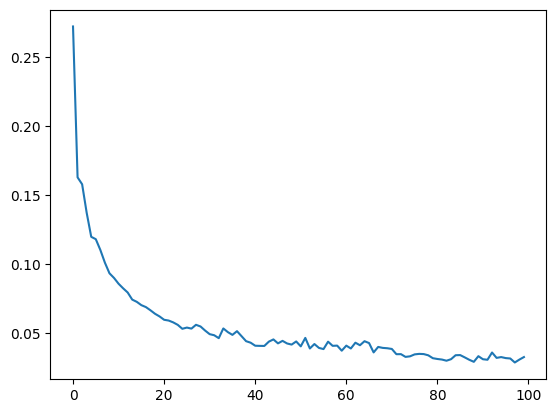

In [44]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();